### Generating trajectories from randomly chosen parameters

In [1]:
# Import all packages/functions here 

from biocrnpyler import *
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

import pandas as pd
import numpy as np
from Parameters import Parameters
from expt_data_import import *
from RunModel import run_CRN_model
from numpy.random import RandomState

from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [2]:
# Load experimental data to compare with CRN simulatino 

[C, C_max, C_0, k_gr, C_max_avg, C_0_avg, k_gr_avg] = Get_OD_Data()
[A_non_leaky, time_A, B_non_leaky, time_B, avg_fold_change] = Get_FLOD_Data()

In [3]:
# Load the model and define the simulation timepoints 

model_degtag = Model(sbml_filename = 'BioCRNpyler_model_degtag_070824.xml')
model_no_tag = Model(sbml_filename = 'BioCRNpyler_model_no_degtag_070824.xml')

N_steps = 1000
t_final = 1000
timepoints = np.linspace(0, t_final, N_steps)

tf_I = 720  # Index of last time point we want to observe (720 minutes) 
tf_i = 72  # Index of last experimental time point we want to observe (720 minutes) 

In [5]:
# Load the parameter file 
p = pd.read_csv('model_param_file_070824.csv').to_numpy()
p = p[:,2]

params = Parameters() # Create the parameter object params


params.add_parameter(name = 'k_RNAP', value = p[0]*1, min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)
params.add_parameter(name = 'k_Ribo', value = p[1]*1, min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)
params.add_parameter(name = 'k_tRNA', value = p[2]*1 , min_bound = 0.014*0.3*0, max_bound = 0.015*3.33)
params.add_parameter(name = 'k_Et', value = p[3]*1, min_bound = 0.014*0.33*0, max_bound = 0.021)
params.add_parameter(name = 'k_protease', value = p[4]*1, min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)

params.add_parameter(name = "Sigma_IC", value = p[5]*1, min_bound = 150, max_bound = 1000)
params.add_parameter(name = "RNAP_IC", value = p[6]*1, min_bound = 200, max_bound = 1000)
params.add_parameter(name = "NT_IC", value = p[7]*1, min_bound = 10, max_bound = 1000)
params.add_parameter(name = "RNAase_IC", value = p[8]*1, min_bound = 10, max_bound = 1000)
params.add_parameter(name = "Et_IC", value = p[9]*1, min_bound = 250, max_bound = 600)
params.add_parameter(name = "AA_IC", value = p[10]*1, min_bound = 300, max_bound = 50000)
params.add_parameter(name = "tRNA_IC", value = p[11]*1, min_bound = 155, max_bound = 900)
params.add_parameter(name = "Ribo_IC", value = p[12]*1, min_bound = 250, max_bound = 900)
params.add_parameter(name = "protease_IC", value = p[13]*1, min_bound = 250, max_bound = 900)

params.add_parameter(name = "Ribo_min", value = p[14]*1, min_bound = 100, max_bound = 250)
params.add_parameter(name = "tRNA_min", value = p[15]*1, min_bound = 100, max_bound = 155)
params.add_parameter(name = "RNAP_min", value = p[16]*1, min_bound = 100, max_bound = 200)
params.add_parameter(name = "Et_min", value = p[17]*1, min_bound = 100, max_bound = 250)
params.add_parameter(name = "protease_min", value = p[18]*1, min_bound = 100, max_bound = 250)

k_tx_1b = 0.0371*1
k_tx_2u = 0.097*2

params.add_parameter(name = 'k_tx_1b', value = p[19]*1, min_bound = 1*1e-3, max_bound = 1*1e-1)
params.add_parameter(name = 'k_tx_1u', value = p[20], min_bound = k_tx_1b*100, max_bound = k_tx_1b*1000)
params.add_parameter(name = 'k_tx_2b', value = p[21]*1 , min_bound = k_tx_2u/1000, max_bound= k_tx_2u/100)
params.add_parameter(name = 'k_tx_2u', value = p[22]*1, min_bound = 0.01, max_bound = 0.1)
params.add_parameter(name = 'k_tx_3', value = p[23]*1, min_bound = 0.001, max_bound = 0.0036)
params.add_parameter(name = 'k_tx_4b', value = p[24], min_bound = 0.1, max_bound = 5)
params.add_parameter(name = 'k_tx_4u', value = p[25]*1, min_bound = 100, max_bound = 200)
params.add_parameter(name = 'k_tx_5', value = p[26]*1, min_bound = 0.1, max_bound = 10)

params.add_parameter(name = 'k_tl_1b', value = p[27], min_bound = 0.03*0.33, max_bound = 0.3*3.33)
params.add_parameter(name = 'k_tl_1u', value = p[28], min_bound = 2.1e4*0.33, max_bound = 2.1e4*3.33)
params.add_parameter(name = 'k_tl_2', value = p[29], min_bound = 1.2e+04*0.33, max_bound = 1.2e+04*3.33)
params.add_parameter(name = 'k_tl_3', value = p[30], min_bound = 3*0.33, max_bound = 3*3.33)
params.add_parameter(name = 'k_tl_4', value = p[31], min_bound = 8.22e+02*0.33, max_bound = 8.22e+02*3.33)
params.add_parameter(name = 'k_tl_5', value = p[32], min_bound = 101.1*0.33, max_bound = 101.1*3.33)
params.add_parameter(name = 'k_tl_6b', value = p[33]*1, min_bound = 1.8e-3*0.33, max_bound = 1.8e-3*3.33)
params.add_parameter(name = 'k_tl_6u', value = p[34]*1, min_bound = 6.0e+02*0.33, max_bound = 6.0e+02*3.33)
params.add_parameter(name = 'k_tl_7', value = p[35]*1, min_bound = 1.6, max_bound = 4.25)
params.add_parameter(name = 'k_tl_8', value = p[36]*1, min_bound = 0.1, max_bound = 0.2)
params.add_parameter(name = "b_tl_8", value = p[37]*1, min_bound = 0.5, max_bound = 1)
params.add_parameter(name = 'k_tl_9', value = p[38]*1, min_bound = 0.05, max_bound = 10)
params.add_parameter(name = 'b_tl_7', value = p[39]*1, min_bound = 0.4, max_bound = 1.5)
params.add_parameter(name = 'k_tl_10', value = p[40]*1, min_bound = 0.0005, max_bound = 0.01)
params.add_parameter(name = 'k_tl_11', value = p[41]*1, min_bound = 0.0005, max_bound = 0.1)
params.add_parameter(name = 'k_tl_12', value = p[42]*1, min_bound = 10, max_bound = 1e3)
params.add_parameter(name = 'k_tl_13b', value = p[43]*1, min_bound = 0.1, max_bound = 10)
params.add_parameter(name = 'k_tl_13u', value = p[44]*1, min_bound = 50, max_bound = 100000)
params.add_parameter(name = 'P_max', value = p[45]*1, min_bound = 1e3, max_bound = 1e6)

params.add_parameter(name = 'C_max', value = p[46])
params.add_parameter(name = "C_0", value = p[47])
params.add_parameter(name = "k_gr", value = p[48])


sol_deg, sol_no_deg = run_CRN_model(params, model_degtag, model_no_tag, timepoints)


/Users/harikrishnan/.local/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


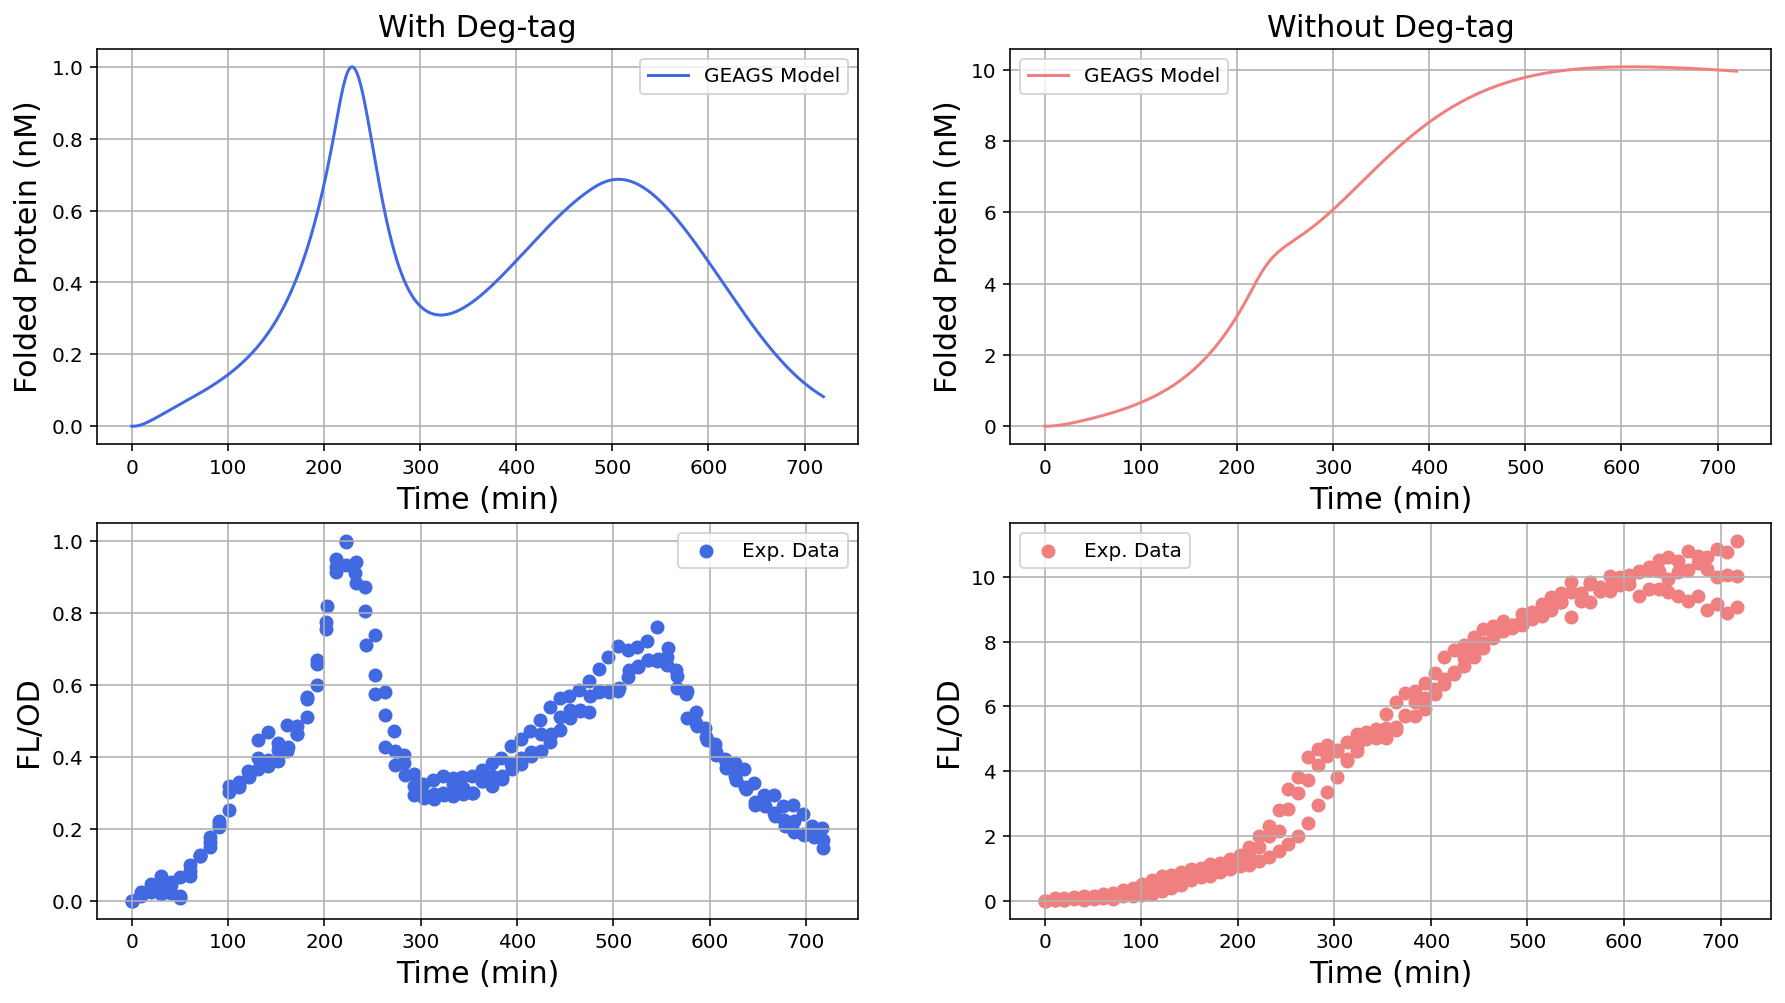

In [6]:
## Plot protein profile for checking the parameters 

fig, ax = plt.subplots(2,2, figsize = (15,8))
fig.subplots_adjust(wspace = 0.2)#, hspace = 0.1)

last_ind = -1
r,c = 0,0
ax[r,c].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), label = "GEAGS Model", color = 'royalblue')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[r,c].set_title('With Deg-tag', fontsize = 15) ; ax[r,c].grid(True) ; ax[r,c].legend()

r,c = 0,1
ax[r,c].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), label = "GEAGS Model", color = 'lightcoral')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[r,c].set_title('Without Deg-tag', fontsize = 15) ; ax[r,c].grid(True) ; ax[r,c].legend()

r,c = 1,0
ax[r,c].scatter(time_A[0][:tf_i], A_non_leaky[0][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', label = 'Exp. Data')
ax[r,c].scatter(time_A[1][:tf_i], A_non_leaky[1][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue')
ax[r,c].scatter(time_A[2][:tf_i], A_non_leaky[2][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('FL/OD', fontsize = 15) ; ax[r,c].legend()
#ax[r,c].set_title('With Deg-tag') ; 
ax[r,c].grid(True)

r,c = 1,1
ax[r,c].scatter(time_B[0][:tf_i], B_non_leaky[0][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', label = 'Exp. Data')
ax[r,c].scatter(time_B[1][:tf_i], B_non_leaky[1][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral')
ax[r,c].scatter(time_B[2][:tf_i], B_non_leaky[2][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('FL/OD', fontsize = 15) ; ax[r,c].legend()
#ax[r,c].set_title('Without Deg-tag') ; 
ax[r,c].grid(True)

### Loading the random parameter set

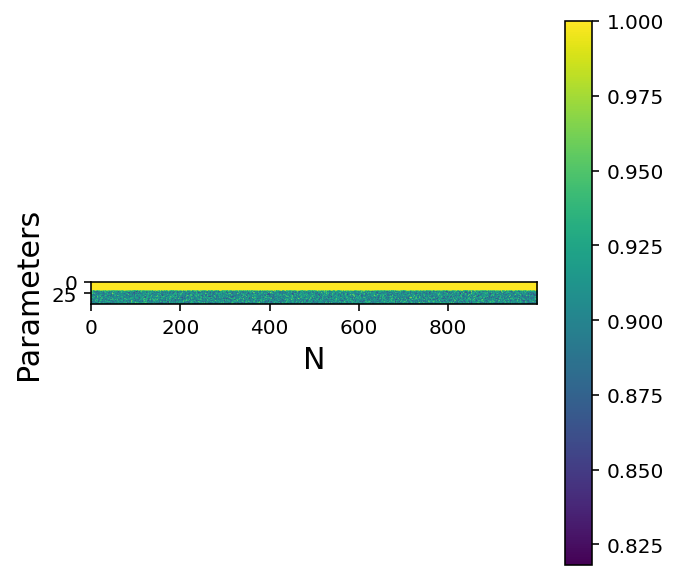

In [7]:
random_param_set = pd.read_csv("random_parameter_1000_sets_081324_IC_constant.csv").to_numpy()
random_param_set = random_param_set[:,1:]

N_set = len(random_param_set[0,:]) # Number of sets 
Np = len(random_param_set[:,0]) # Number of random parameters we have


# # Visualize how random is the array 
mean = np.mean(random_param_set, axis = 1)
mean = np.reshape(mean, (-1,1))
std = np.std(random_param_set, axis = 1)
std = np.reshape(std, (-1,1))
max = np.max(random_param_set, axis = 1)
max = np.reshape(max, (-1,1))
# Normalizing each row of the array with the maximum value of each parameter 
normalised_params_array = (random_param_set/max)


fig, ax = plt.subplots(1,1, figsize = (5,5))

p = ax.imshow(normalised_params_array)
cb = fig.colorbar(p)

ax.set_xlabel('N', fontsize = 15) ; ax.set_ylabel('Parameters', fontsize = 15); 


In [8]:
## Generate random set of parameters from the above parameters 

N = 100 # Number of trajectories we want
Np = len(random_param_set[:,0]) # Number of random parameters we have
parameter_set = np.zeros((Np,N))


# To ensure same set of random numbers are produced 
rand = RandomState(123)

for i in range(Np):
    
    # Generate an array of size 1xN, where u have chosen N random parameters from ith row of params array
    rand_IC_P_row = random_param_set[i,:]
    rand_P_list = rand.choice(a = rand_IC_P_row, size = N)

    parameter_set[i,:] = rand_P_list

np.shape(parameter_set)

(49, 100)

In [9]:
# Generate random trajectories 

random_IC_sol_deg = np.zeros((N, N_steps))
random_IC_sol_no_deg = np.zeros((N, N_steps))

for i in range(N): 

    rand_params = Parameters() # Parameters to be randomized 


    rand_params.add_parameter(name = 'k_RNAP', value = parameter_set[0,i]*1, min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)
    rand_params.add_parameter(name = 'k_Ribo', value = parameter_set[1,i], min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)
    rand_params.add_parameter(name = 'k_tRNA', value = parameter_set[2,i] , min_bound = 0.014*0.3*0, max_bound = 0.015*3.33)
    rand_params.add_parameter(name = 'k_Et', value = parameter_set[3,i], min_bound = 0.014*0.33*0, max_bound = 0.021)
    rand_params.add_parameter(name = 'k_protease', value = parameter_set[4,i], min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)

    rand_params.add_parameter(name = "Sigma_IC", value = parameter_set[5,i], min_bound = 150, max_bound = 1000)
    rand_params.add_parameter(name = "RNAP_IC", value = parameter_set[6,i], min_bound = 200, max_bound = 1000)
    rand_params.add_parameter(name = "NT_IC", value = parameter_set[7,i], min_bound = 10, max_bound = 1000)
    rand_params.add_parameter(name = "RNAase_IC", value = parameter_set[8,i], min_bound = 10, max_bound = 1000)
    rand_params.add_parameter(name = "Et_IC", value = parameter_set[9,i], min_bound = 250, max_bound = 600)
    rand_params.add_parameter(name = "AA_IC", value = parameter_set[10,i], min_bound = 300, max_bound = 50000)
    rand_params.add_parameter(name = "tRNA_IC", value = parameter_set[11,i], min_bound = 155, max_bound = 900)
    rand_params.add_parameter(name = "Ribo_IC", value = parameter_set[12,i], min_bound = 250, max_bound = 900)
    rand_params.add_parameter(name = "protease_IC", value = parameter_set[13,i], min_bound = 250, max_bound = 900)

    rand_params.add_parameter(name = "Ribo_min", value = parameter_set[14,i], min_bound = 100, max_bound = 250)
    rand_params.add_parameter(name = "tRNA_min", value = parameter_set[15,i], min_bound = 100, max_bound = 155)
    rand_params.add_parameter(name = "RNAP_min", value = parameter_set[16,i], min_bound = 100, max_bound = 200)
    rand_params.add_parameter(name = "Et_min", value = parameter_set[17,i], min_bound = 100, max_bound = 250)
    rand_params.add_parameter(name = "protease_min", value = parameter_set[18,i], min_bound = 100, max_bound = 250)

    k_tx_1b = 0.0371*1
    k_tx_2u = 0.097*2

    rand_params.add_parameter(name = 'k_tx_1b', value = parameter_set[19,i], min_bound = 1*1e-3, max_bound = 1*1e-1)
    rand_params.add_parameter(name = 'k_tx_1u', value = parameter_set[20,i], min_bound = k_tx_1b*100, max_bound = k_tx_1b*1000)
    rand_params.add_parameter(name = 'k_tx_2b', value = parameter_set[21,i] , min_bound = k_tx_2u/1000, max_bound= k_tx_2u/100)
    rand_params.add_parameter(name = 'k_tx_2u', value = parameter_set[22,i], min_bound = 0.01, max_bound = 0.1)
    rand_params.add_parameter(name = 'k_tx_3', value = parameter_set[23,i], min_bound = 0.001, max_bound = 0.0036)
    rand_params.add_parameter(name = 'k_tx_4b', value = parameter_set[24,i], min_bound = 0.1, max_bound = 5)
    rand_params.add_parameter(name = 'k_tx_4u', value = parameter_set[25,i], min_bound = 100, max_bound = 200)
    rand_params.add_parameter(name = 'k_tx_5', value = parameter_set[26,i], min_bound = 0.1, max_bound = 10)

    rand_params.add_parameter(name = 'k_tl_1b', value = parameter_set[27,i], min_bound = 0.03*0.33, max_bound = 0.3*3.33)
    rand_params.add_parameter(name = 'k_tl_1u', value = parameter_set[28,i], min_bound = 2.1e4*0.33, max_bound = 2.1e4*3.33)
    rand_params.add_parameter(name = 'k_tl_2', value = parameter_set[29,i], min_bound = 1.2e+04*0.33, max_bound = 1.2e+04*3.33)
    rand_params.add_parameter(name = 'k_tl_3', value = parameter_set[30,i], min_bound = 3*0.33, max_bound = 3*3.33)
    rand_params.add_parameter(name = 'k_tl_4', value = parameter_set[31,i], min_bound = 8.22e+02*0.33, max_bound = 8.22e+02*3.33)
    rand_params.add_parameter(name = 'k_tl_5', value = parameter_set[32,i], min_bound = 101.1*0.33, max_bound = 101.1*3.33)
    rand_params.add_parameter(name = 'k_tl_6b', value = parameter_set[33,i], min_bound = 1.8e-3*0.33, max_bound = 1.8e-3*3.33)
    rand_params.add_parameter(name = 'k_tl_6u', value = parameter_set[34,i], min_bound = 6.0e+02*0.33, max_bound = 6.0e+02*3.33)
    rand_params.add_parameter(name = 'k_tl_7', value = parameter_set[35,i], min_bound = 1.6, max_bound = 4.25)
    rand_params.add_parameter(name = 'k_tl_8', value = parameter_set[36,i], min_bound = 0.1, max_bound = 0.2)
    rand_params.add_parameter(name = "b_tl_8", value = parameter_set[37,i], min_bound = 0.5, max_bound = 1)
    rand_params.add_parameter(name = 'k_tl_9', value = parameter_set[38,i], min_bound = 0.05, max_bound = 10)
    rand_params.add_parameter(name = 'b_tl_7', value = parameter_set[39,i], min_bound = 0.4, max_bound = 1.5)
    rand_params.add_parameter(name = 'k_tl_10', value = parameter_set[40,i], min_bound = 0.0005, max_bound = 0.01)
    rand_params.add_parameter(name = 'k_tl_11', value = parameter_set[41,i], min_bound = 0.0005, max_bound = 0.1)
    rand_params.add_parameter(name = 'k_tl_12', value = parameter_set[42,i], min_bound = 10, max_bound = 1e3)
    rand_params.add_parameter(name = 'k_tl_13b', value = parameter_set[43,i], min_bound = 0.1, max_bound = 10)
    rand_params.add_parameter(name = 'k_tl_13u', value = parameter_set[44,i], min_bound = 50, max_bound = 100000)
    rand_params.add_parameter(name = 'P_max', value = parameter_set[45,i], min_bound = 1e3, max_bound = 1e6)

    rand_params.add_parameter(name = 'C_max', value = parameter_set[46,i])
    rand_params.add_parameter(name = "C_0", value = parameter_set[47,i])
    rand_params.add_parameter(name = "k_gr", value = parameter_set[48,i])
    

    sol_deg_rand, sol_no_deg_rand = run_CRN_model(rand_params, model_degtag, model_no_tag, timepoints)

    random_IC_sol_deg[i,:] = sol_deg_rand['protein_X']
    random_IC_sol_no_deg[i,:] = sol_no_deg_rand['protein_X']

/Users/harikrishnan/.local/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


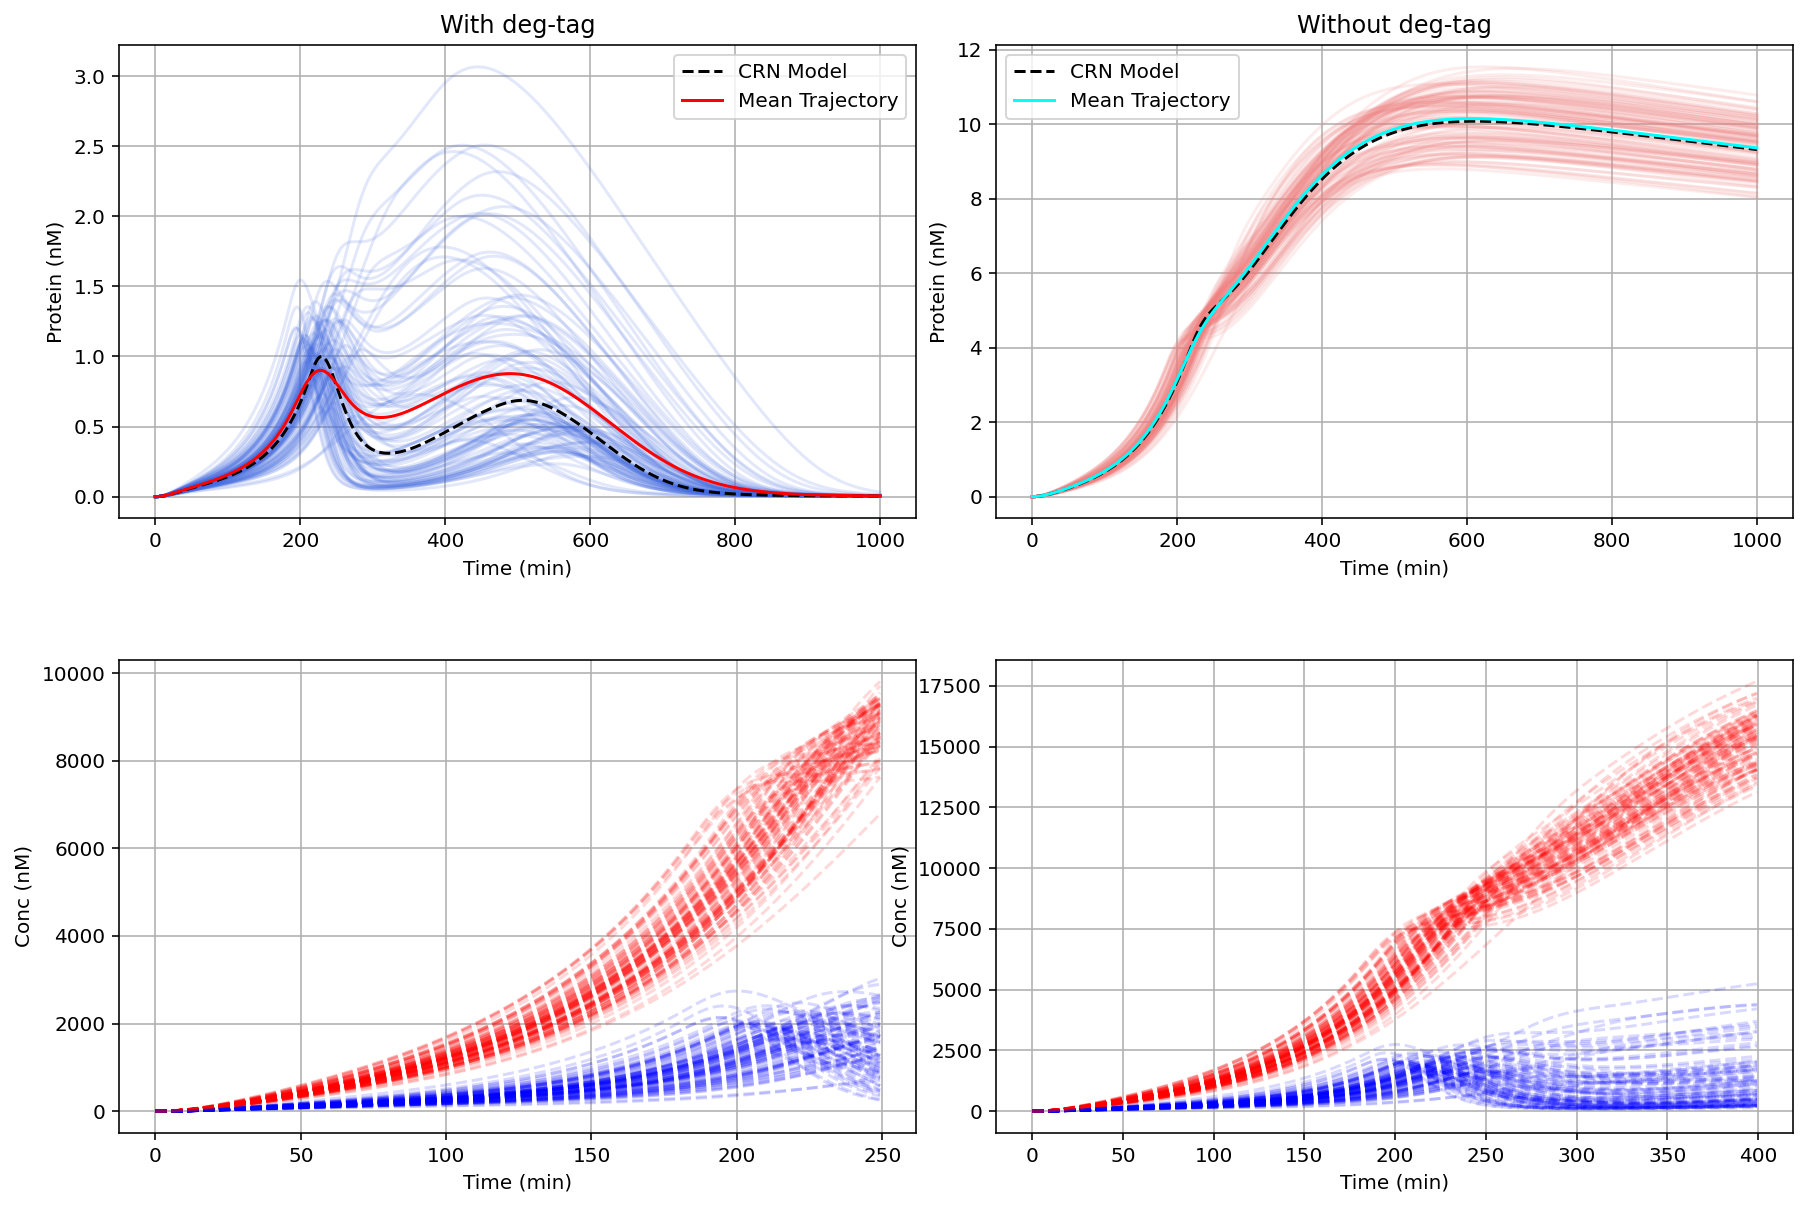

In [10]:
fig,ax = plt.subplots(2,2, figsize = (15,10))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

# Create a colormap to generate a sequence of distinct colors
colormap = plt.cm.get_cmap('jet', N)
alpha = 0.15

scat = 0.1

for i in range(N): 

    ax[0,0].plot(timepoints, random_IC_sol_deg[i, :]/np.max(sol_deg['protein_X']), color = 'royalblue', alpha = alpha)
    
    ax[0,0].set_xlabel('Time (min)') ; ax[0,0].set_ylabel('Protein (nM)') ; 
    ax[0,0].set_title('With deg-tag')
    ax[0,0].grid(True) ; 

    ax[0,1].plot(timepoints, random_IC_sol_no_deg[i, :]/np.max(sol_deg['protein_X']), color = 'lightcoral', alpha = alpha)
    ax[0,1].set_xlabel('Time (min)') ; ax[0,1].set_ylabel('Protein (nM)') ; 
    
    ax[0,1].set_title('Without deg-tag')
    ax[0,1].grid(True) ; 


    last_time = 250

    ax[1,0].plot(timepoints[:last_time], random_IC_sol_deg[i, :last_time], '--', label = "Model Fit", color = 'blue', alpha = alpha)
    ax[1,0].plot(timepoints[:last_time], random_IC_sol_no_deg[i, :last_time], '--', label = "Model Fit", color = 'red', alpha = alpha)
    ax[1,0].set_xlabel('Time (min)') ; ax[1,0].set_ylabel('Conc (nM)') 

    last_time = 400

    ax[1,1].plot(timepoints[:last_time], random_IC_sol_deg[i, :last_time], '--', label = "Model Fit", color = 'blue', alpha = alpha)
    ax[1,1].plot(timepoints[:last_time], random_IC_sol_no_deg[i, :last_time], '--', label = "Model Fit", color = 'red', alpha = alpha)
    ax[1,1].set_xlabel('Time (min)') ; ax[1,1].set_ylabel('Conc (nM)')

ax[0,0].plot(timepoints, sol_deg['protein_X']/np.max(sol_deg['protein_X']), '--', color = 'black', label = 'CRN Model')
ax[0,0].plot(timepoints, np.mean(random_IC_sol_deg, axis = 0)/np.max(sol_deg['protein_X']), color = 'red', label = 'Mean Trajectory')
ax[0,0].legend()


ax[0,1].plot(timepoints, sol_no_deg['protein_X']/np.max(sol_deg['protein_X']), '--', color = 'black', label = 'CRN Model')
ax[0,1].plot(timepoints, np.mean(random_IC_sol_no_deg, axis = 0)/np.max(sol_deg['protein_X']), color = 'cyan', label = 'Mean Trajectory')
ax[0,1].legend()


ax[1,0].grid(True)
ax[1,1].grid(True)

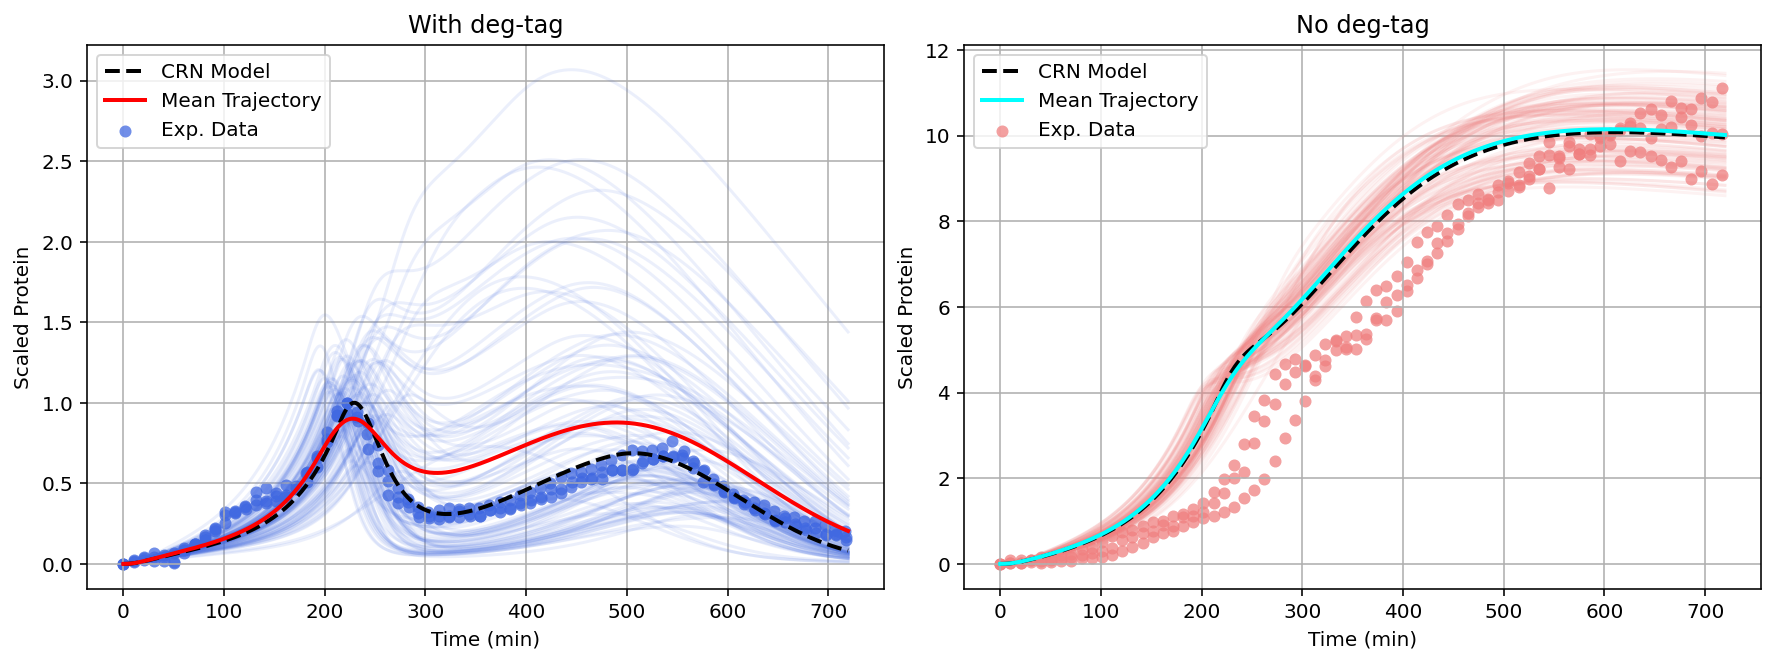

In [11]:
## Compare with experimental data 

fig,ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

# Create a colormap to generate a sequence of distinct colors
colormap = plt.cm.get_cmap('jet', N)
alpha = 0.1
alpha_scat = 0.75
lwidth = 2
scat = 0.005

for i in range(N): 

    ax[0].plot(timepoints[:tf_I], random_IC_sol_deg[i, :][:tf_I]/np.max(sol_deg['protein_X']), color = 'royalblue', alpha = alpha)
    
    ax[0].set_xlabel('Time (min)') ; ax[0].set_ylabel('Scaled Protein') ; 
    ax[0].set_title('With deg-tag')
    ax[0].grid(True) ; 

    ax[1].plot(timepoints[:tf_I], random_IC_sol_no_deg[i, :][:tf_I]/np.max(sol_deg['protein_X']), color = 'lightcoral', alpha = alpha)
    ax[1].set_xlabel('Time (min)') ; ax[1].set_ylabel('Scaled Protein') ; 
    
    ax[1].set_title('No deg-tag')
    ax[1].grid(True) ; 

r = 0
ax[0].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '--', color = 'black', label = 'CRN Model', linewidth = lwidth)
ax[0].plot(timepoints[:tf_I], np.mean(random_IC_sol_deg, axis = 0)[:tf_I]/np.max(sol_deg['protein_X']), color = 'red', label = 'Mean Trajectory', linewidth = lwidth)
ax[r].scatter(time_A[0][:tf_i], A_non_leaky[0][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', label = 'Exp. Data', linewidth = scat, alpha = alpha_scat)
ax[r].scatter(time_A[1][:tf_i], A_non_leaky[1][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', linewidth = scat, alpha = alpha_scat)
ax[r].scatter(time_A[2][:tf_i], A_non_leaky[2][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', linewidth = scat, alpha = alpha_scat)
ax[0].legend()


r = 1
ax[1].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '--', color = 'black', label = 'CRN Model', linewidth = lwidth)
ax[1].plot(timepoints[:tf_I], np.mean(random_IC_sol_no_deg, axis = 0)[:tf_I]/np.max(sol_deg['protein_X']), color = 'cyan', label = 'Mean Trajectory', linewidth = lwidth)
ax[r].scatter(time_B[0][:tf_i], B_non_leaky[0][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', linewidth = scat, alpha = alpha_scat)
ax[r].scatter(time_B[1][:tf_i], B_non_leaky[1][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', linewidth = scat, alpha = alpha_scat)
ax[r].scatter(time_B[2][:tf_i], B_non_leaky[2][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', label = 'Exp. Data', linewidth = scat, alpha = alpha_scat)
ax[1].legend()


ax[0].grid(True)
ax[1].grid(True)

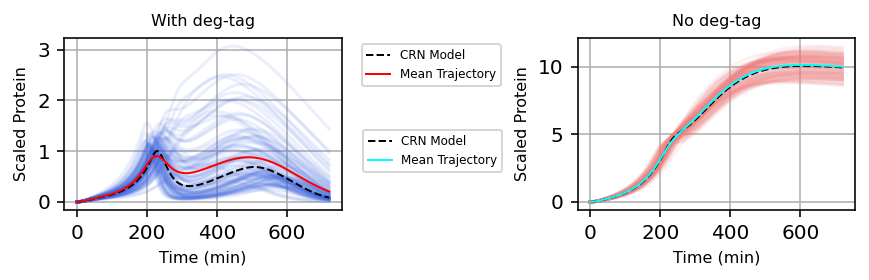

In [12]:
## Generate high quality image for the paper 

mm = 1/2.54/10  # centimeters in inches
fig, ax = plt.subplots(1,2, figsize = (180 * mm, 40 * mm), sharex = 'col')
fig.subplots_adjust(wspace = 0.85, hspace = 0.3)

# Create a colormap to generate a sequence of distinct colors
colormap = plt.cm.get_cmap('jet', N)
alpha = 0.1
alpha_scat = 0.3
lwidth = 1
scat = 0.001

for i in range(N): 

    ax[0].plot(timepoints[:tf_I], random_IC_sol_deg[i, :][:tf_I]/np.max(sol_deg['protein_X']), color = 'royalblue', alpha = alpha)
    
    ax[0].set_xlabel('Time (min)', fontsize = 8) ; ax[0].set_ylabel('Scaled Protein', fontsize = 8) ; 
    ax[0].set_title('With deg-tag', fontsize = 8)
    ax[0].grid(True) ; 

    ax[1].plot(timepoints[:tf_I], random_IC_sol_no_deg[i, :][:tf_I]/np.max(sol_deg['protein_X']), color = 'lightcoral', alpha = alpha)
    ax[1].set_xlabel('Time (min)', fontsize = 8) ; ax[1].set_ylabel('Scaled Protein', fontsize = 8) ; 
    
    ax[1].set_title('No deg-tag', fontsize = 8)
    ax[1].grid(True) ; 

r = 0
ax[0].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '--', color = 'black', label = 'CRN Model', linewidth = lwidth)
ax[0].plot(timepoints[:tf_I], np.mean(random_IC_sol_deg, axis = 0)[:tf_I]/np.max(sol_deg['protein_X']), color = 'red', label = 'Mean Trajectory', linewidth = lwidth)
# ax[r].scatter(time_A[0][:tf_i], A_non_leaky[0][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', label = 'Exp. Data', linewidth = scat, alpha = alpha_scat)
# ax[r].scatter(time_A[1][:tf_i], A_non_leaky[1][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', linewidth = scat, alpha = alpha_scat)
# ax[r].scatter(time_A[2][:tf_i], A_non_leaky[2][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', linewidth = scat, alpha = alpha_scat)
ax[0].legend(fontsize = 6, bbox_to_anchor = (1.05,1))


r = 1
ax[1].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '--', color = 'black', label = 'CRN Model', linewidth = lwidth)
ax[1].plot(timepoints[:tf_I], np.mean(random_IC_sol_no_deg, axis = 0)[:tf_I]/np.max(sol_deg['protein_X']), color = 'cyan', label = 'Mean Trajectory', linewidth = lwidth)
# ax[r].scatter(time_B[0][:tf_i], B_non_leaky[0][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', linewidth = scat, alpha = alpha_scat)
# ax[r].scatter(time_B[1][:tf_i], B_non_leaky[1][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', linewidth = scat, alpha = alpha_scat)
# ax[r].scatter(time_B[2][:tf_i], B_non_leaky[2][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', label = 'Exp. Data', linewidth = scat, alpha = alpha_scat)
ax[1].legend(fontsize = 6, bbox_to_anchor = (-0.25,0.5))


ax[0].grid(True)
ax[1].grid(True)
#fig.savefig('random_trajectories_IC_constant.svg', dpi = 300, bbox_inches='tight')

In [13]:
## Calculate the Confidence Interval 

deg_std = np.std(random_IC_sol_deg, axis = 0)
no_deg_std = np.std(random_IC_sol_no_deg, axis = 0)

std_fac = 1.96

confidence_interval_deg_pos = (np.mean(random_IC_sol_deg, axis = 0) + deg_std * std_fac)/np.max(sol_deg['protein_X'])
confidence_interval_deg_neg = (np.mean(random_IC_sol_deg, axis = 0) - deg_std * std_fac)/np.max(sol_deg['protein_X'])

confidence_interval_no_deg_pos = (np.mean(random_IC_sol_no_deg, axis = 0) + no_deg_std * std_fac)/np.max(sol_deg['protein_X'])
confidence_interval_no_deg_neg = (np.mean(random_IC_sol_no_deg, axis = 0) - no_deg_std * std_fac)/np.max(sol_deg['protein_X'])

deg_mean_scaled = np.mean(random_IC_sol_deg, axis = 0)/np.max(sol_deg['protein_X'])
no_deg_mean_scaled = np.mean(random_IC_sol_no_deg, axis = 0)/np.max(sol_deg['protein_X'])

Text(0.5, 0.98, 'Confidence interval estimated from the random trajectories')

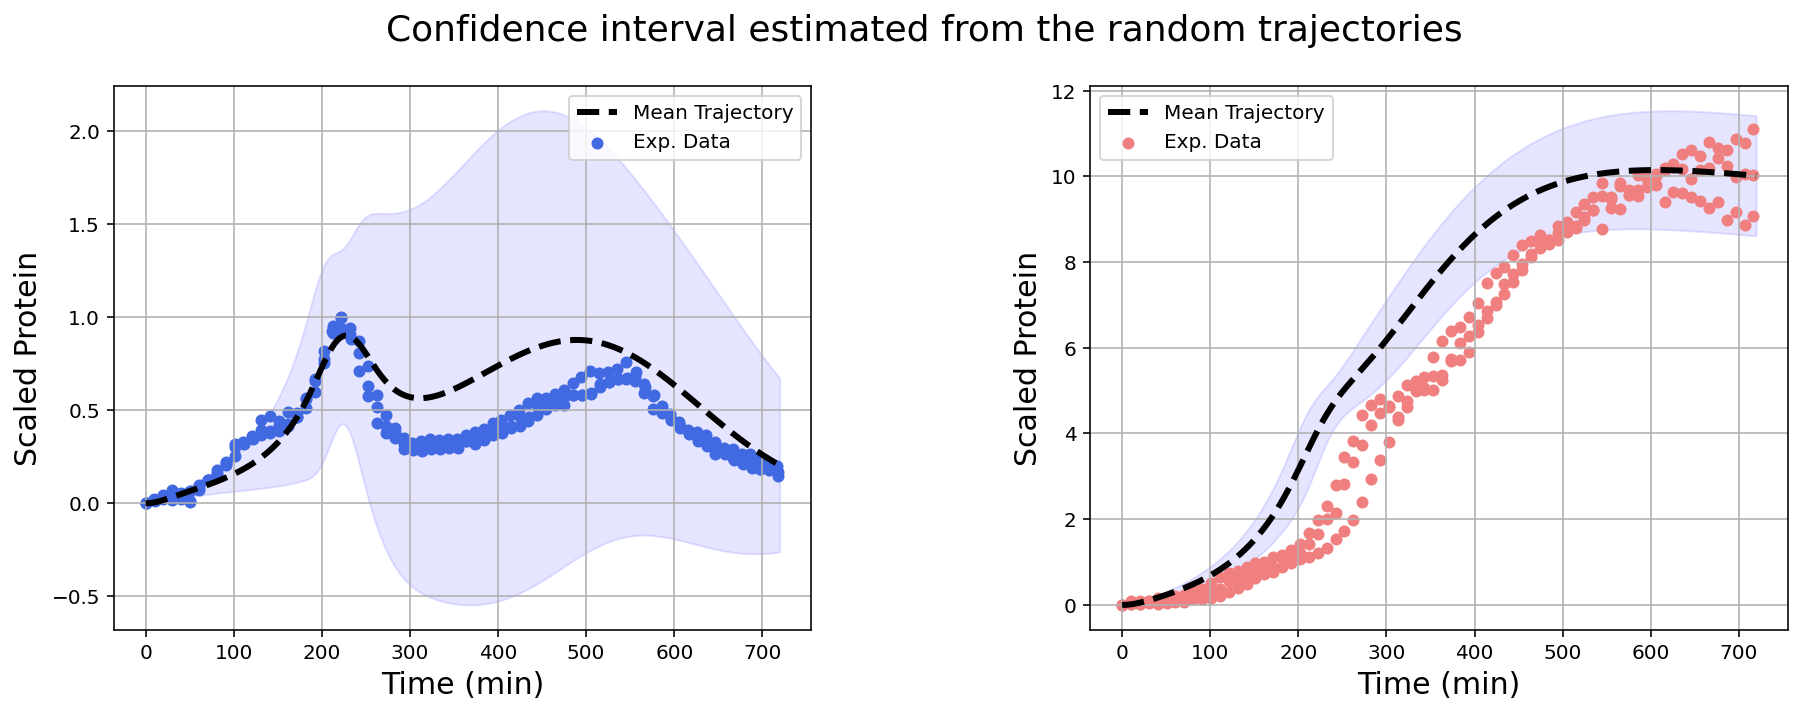

In [14]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.4)#, hspace = 0.1)

alpha = 0.1
lwidth = 3

r = 0
ax[r].fill_between(timepoints[:tf_I], confidence_interval_deg_neg[:tf_I], confidence_interval_deg_pos[:tf_I], color='blue', alpha = alpha)

ax[r].scatter(time_A[0][:tf_i], A_non_leaky[0][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', label = 'Exp. Data', linewidth = scat)
ax[r].scatter(time_A[1][:tf_i], A_non_leaky[1][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', linewidth = scat)
ax[r].scatter(time_A[2][:tf_i], A_non_leaky[2][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', linewidth = scat)

ax[r].plot(timepoints[:tf_I], deg_mean_scaled[:tf_I], '--', label = "Mean Trajectory", color = 'k', linewidth = lwidth)


ax[r].set_xlabel('Time (min)', fontsize = 15) ; ax[r].set_ylabel('Scaled Protein', fontsize = 15) ; ax[r].legend()
#ax[r,c].set_title('With Deg-tag') ; 
ax[r].grid(True)

r = 1
ax[r].fill_between(timepoints[:tf_I], confidence_interval_no_deg_neg[:tf_I], confidence_interval_no_deg_pos[:tf_I], color='blue', alpha = alpha)

ax[r].scatter(time_B[0][:tf_i], B_non_leaky[0][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', linewidth = scat)
ax[r].scatter(time_B[1][:tf_i], B_non_leaky[1][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', linewidth = scat)
ax[r].scatter(time_B[2][:tf_i], B_non_leaky[2][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', label = 'Exp. Data', linewidth = scat)

ax[r].plot(timepoints[:tf_I],  no_deg_mean_scaled[:tf_I], '--', label = "Mean Trajectory", color = 'k', linewidth = lwidth)


ax[r].set_xlabel('Time (min)', fontsize = 15) ; ax[r].set_ylabel('Scaled Protein', fontsize = 15) ; ax[r].legend()
#ax[r,c].set_title('Without Deg-tag') ; 
ax[r].grid(True)

fig.suptitle('Confidence interval estimated from the random trajectories', fontsize = 18)